# Udacity - Investigating a dataset project  
## Data Analysis process 
##### Questions 
##### Wrangle Data 
##### Exploratory Data Analysis 
##### Draw Conclusion  
##### Communicate your results 

In [1]:
# importing the requried packages 
import pandas as pd 
import numpy as np 
#import matplotlib.pyplot as plt 
import seaborn as sns 


import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data Wrangling

In [2]:
# overview of the data 
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head(5)   

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
movie_data.shape   # getting the shape of the data 

(10866, 21)

#### checking column labels and data types

In [4]:
movie_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Filter DropNull, Dedupe

In [5]:
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Dealing with duplicates 
### cheaking the duplicates in the data 

In [6]:
sum(movie_data.duplicated())

1

#### so we have one duplicate value  
#### droping the duplicate 

In [7]:
movie_data.drop_duplicates(inplace = True)


In [8]:
sum(movie_data.duplicated())

0

### checking null values in each column

In [9]:
movie_data.isnull().sum()   

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Mean of null values

In [10]:
movie_data.isnull().mean()

id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006995
homepage                0.729775
director                0.004050
tagline                 0.259917
keywords                0.137414
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094800
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

## Droping null values

In [11]:
movie_data.dropna(inplace = True)

### Data set rows are redused to 1992 rows after droping the null values 

In [12]:
movie_data.shape 

(1992, 21)

# Extraneous columns  
#### Getting rid of Extraneous columns

In [13]:
# data set contains  extranrous columns like homepage, cast, tagline, overview.

movie_data.drop(['homepage', 'cast', 'tagline', 'overview'], axis = 1, inplace = True)

### checking the columns to confirm 

In [14]:
print(movie_data.columns) 
print(movie_data.shape)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')
(1992, 17)


# Fixing column data types 

In [15]:
#changing release_data column to datetime format 
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

In [16]:
movie_data['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10724   2069-12-12
10759   1978-10-25
10760   1978-07-27
10817   1978-05-01
10819   1978-07-28
Name: release_date, Length: 1992, dtype: datetime64[ns]

# Corelations in movie_data set  
## This discribes the +ve and -ve corelations between each column

In [17]:
movie_data.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.022330 -0.166067 -0.125101 -0.025016   -0.069752   
popularity    0.022330    1.000000  0.513553  0.641346  0.220787    0.774226   
budget       -0.166067    0.513553  1.000000  0.747273  0.269480    0.649130   
revenue      -0.125101    0.641346  0.747273  1.000000  0.257756    0.804788   
runtime      -0.025016    0.220787  0.269480  0.257756  1.000000    0.280602   
vote_count   -0.069752    0.774226  0.649130  0.804788  0.280602    1.000000   
vote_average -0.066973    0.298066  0.118651  0.258208  0.243699    0.379345   
release_year  0.507116    0.002262  0.068611 -0.031835 -0.078525    0.006364   
budget_adj   -0.208151    0.504971  0.988433  0.752853  0.282257    0.642077   
revenue_adj  -0.165386    0.600277  0.630719  0.925494  0.257378    0.741541   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.066973      0.507116   -0.208151    -0.165386  
popularity        0.298066      0.002262    0.504971     0.600277  
budget            0.118651      0.068611    0.988433     0.630719  
revenue           0.258208     -0.031835    0.752853     0.925494  
runtime           0.243699     -0.078525    0.282257     0.257378  
vote_count        0.379345      0.006364    0.642077     0.741541  
vote_average      1.000000     -0.152250    0.128789     0.274923  
release_year     -0.152250      1.000000   -0.027940    -0.237684  
budget_adj        0.128789     -0.027940    1.000000     0.669152  
revenue_adj       0.274923     -0.237684    0.669152     1.000000

# Stastical Overview 

In [18]:
movie_data.describe()

id   popularity        budget       revenue      runtime  \
count    1992.000000  1992.000000  1.992000e+03  1.992000e+03  1992.000000   
mean    71652.152108     1.316763  3.454924e+07  1.152153e+08   106.040161   
std     92355.883915     1.873563  5.061878e+07  2.202887e+08    29.234592   
min        11.000000     0.000620  0.000000e+00  0.000000e+00     0.000000   
25%      9699.000000     0.384079  0.000000e+00  0.000000e+00    92.000000   
50%     35112.500000     0.774223  1.500000e+07  2.578782e+07   102.000000   
75%     83573.000000     1.538639  4.800000e+07  1.278787e+08   116.000000   
max    414419.000000    32.985763  4.250000e+08  2.781506e+09   705.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  1992.000000   1992.000000   1992.000000  1.992000e+03  1.992000e+03  
mean    643.616968      6.178614   2007.796687  3.627376e+07  1.302391e+08  
std    1092.355998      0.881955      7.549224  5.129783e+07  2.564338e+08  
min      10.000000      2.100000   1961.000000  0.000000e+00  0.000000e+00  
25%      51.000000      5.600000   2006.000000  0.000000e+00  0.000000e+00  
50%     210.000000      6.200000   2010.000000  1.524601e+07  2.806370e+07  
75%     688.250000      6.800000   2012.000000  5.064450e+07  1.393645e+08  
max    9767.000000      8.300000   2015.000000  4.250000e+08  2.827124e+09

# Exploratory Data Analysis 

In [19]:
movie_data.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title          director  \
0                Jurassic World   Colin Trevorrow   
1            Mad Max: Fury Road     George Miller   
2                     Insurgent  Robert Schwentke   
3  Star Wars: The Force Awakens       J.J. Abrams   
4                     Furious 7         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

# Data Visulization
# Questions based on data

## Q1 - Which year has highest number of movies released?


In [20]:
#movie_data['release_year'].value_counts() 
data = movie_data.groupby('release_year').count()['id']
data

release_year
1961      1
1962      1
1963      1
1964      2
1965      1
1967      1
1969      1
1970      1
1971      4
1972      1
1973      2
1974      2
1975      3
1976      2
1977      3
1978      4
1979      5
1980      2
1981      6
1982      3
1983      6
1984      5
1985      4
1986      2
1987      8
1988      4
1989      5
1990      6
1991      3
1992      5
1993     10
1994      8
1995     10
1996     15
1997     11
1998     13
1999     24
2000     20
2001     19
2002     31
2003     40
2004     48
2005     72
2006     92
2007    135
2008    142
2009    192
2010    206
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64

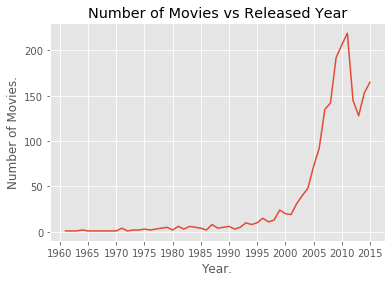

In [21]:
plt.xticks(np.arange(1960,2020,5))
plt.xlabel("Year.")
plt.ylabel("Number of Movies.")
plt.title("Number of Movies vs Released Year")
plt.plot(data)
plt.show()

#### the above graph describe the no of movies released in each year 
####  it seems the highest no of movies released in 2011 

# Did movies with higher vote count received a better rating?

In [22]:

#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = movie_data.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000] 
df_vote.tail()


vote_count  vote_average
10724         258           6.4
10759         522           7.3
10760         230           6.7
10817          33           8.0
10819          13           6.0

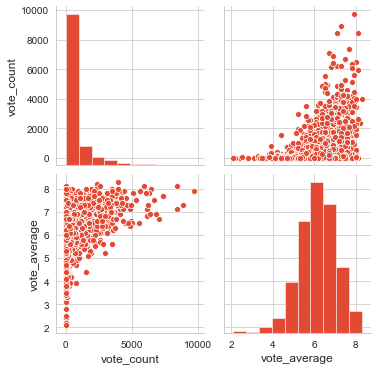

In [23]:
sns.set_style('whitegrid') 
sns.pairplot(df_vote[['vote_count','vote_average']]) 


#### the graphs describe that vote count and vote average has positive correlaion 

In [24]:
df_vote.corr()

vote_count  vote_average
vote_count      1.000000      0.379345
vote_average    0.379345      1.000000

In [25]:
df_vote_2000.corr()

vote_count  vote_average
vote_count      1.000000      0.305343
vote_average    0.305343      1.000000

# Which director has heighest profit margin?

In [26]:
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']
movie_data[['profit']].head()

profit
0  1363528810
1   228436354
2   185238201
3  1868178225
4  1316249360

Director with highest profit director     James Wan
profit      2544505847
dtype: object


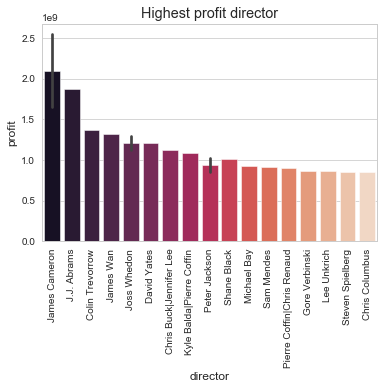

In [27]:
def director_with_profit(): 
    data  = pd.DataFrame(movie_data[['director', 'profit']].sort_values(by = 'profit',               ascending = False)) 
    print(f'Director with highest profit {data.head().max()}')
    sns.barplot(x= 'director', y= 'profit', palette="rocket", data = data[:20])
    plt.xticks(rotation = 90)
    plt.title('Highest profit director') 
director_with_profit()

## the above bar graph says that James Cameron has highest profit 

# The director who made movies with highest budget 

In [61]:
data_2 = movie_data[['director','budget']]
directors = data_2.sort_values(by = 'budget', ascending = False)
directors.head(1)

director     budget
2244  Sngmoo Lee  425000000

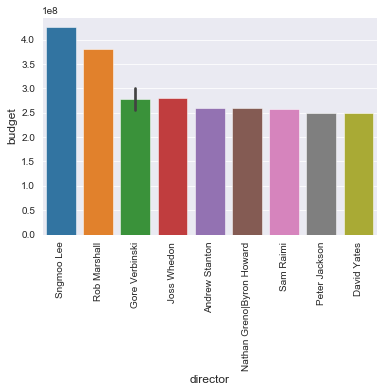

In [60]:
sns.barplot(x = 'director', y ='budget',palette="tab10", data = directors[:10].sort_values(by = 'budget', ascending = False));
plt.xticks(rotation = 90);

Text(0.5, 1, 'Budget vs Revenue')

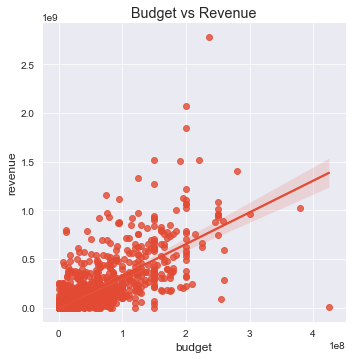

In [30]:
sns.set_style('darkgrid')
sns.lmplot(x="budget", y="revenue", data=movie_data);
plt.title('Budget vs Revenue') 


In [31]:
data = movie_data[['popularity','revenue','budget','vote_count','vote_average','release_year']] 
data.head()

popularity     revenue     budget  vote_count  vote_average  release_year
0   32.985763  1513528810  150000000        5562           6.5          2015
1   28.419936   378436354  150000000        6185           7.1          2015
2   13.112507   295238201  110000000        2480           6.3          2015
3   11.173104  2068178225  200000000        5292           7.5          2015
4    9.335014  1506249360  190000000        2947           7.3          2015

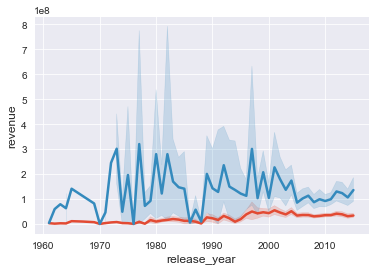

In [32]:
sns.lineplot(x = data['release_year'], y = data['budget'], palette="tab10", linewidth=2.5)
sns.lineplot(x = data['release_year'], y = data['revenue'], palette="tab10",linewidth=2.5) 

Text(0.5, 1.05, 'Analysis on revenue, vote_count, vote_average')

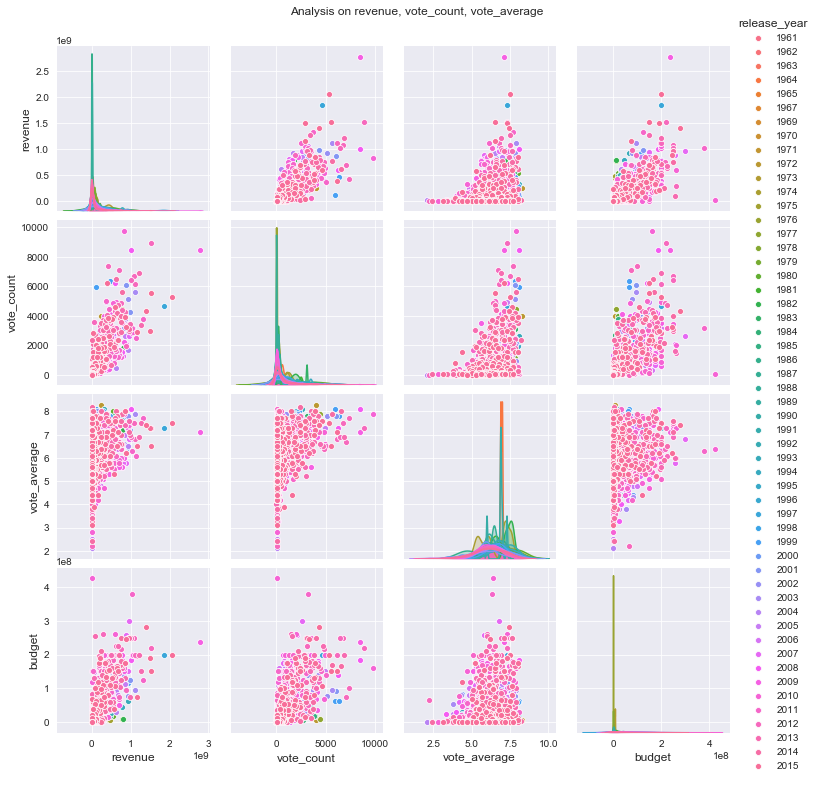

In [33]:
t = sns.pairplot(data[['revenue','release_year','vote_count','vote_average','budget']],hue='release_year');  
t.fig.suptitle('Analysis on revenue, vote_count, vote_average', y = 1.05)

'''Looks like there is a positive correlation between budget and revenue, and a very slight positive correlation with release year and budget. 
--> With average rating slightly positive influenced by budget. These are only slight though, so the analysis here is limited. This does not indicate a causation in improvement in revenue/rating and a much deeper analysis would be required to find any correlation'''



# Limitations and assumptions : 
  ## 1.The coorelation between revenue and budget is 0.747273 
  ## 2. Director james Cameron has heighest profit margin  2544505847.
  ## 3. In year 2014 max number of movie is released i.e. 700 and In year 1961 and 1969           lowest number of movie is released i.e. 31. 
 ### 4. Top five genres according to their budgets are listed above in which comedy genre         has heighest budget. The mean of the Comedy Budget are 2.632826e+07.  
 ### 5. Assumimng 0 revenue and 0 budget are actually missing values and not actually 0           revenue and 0 budget. 